In [1]:
import sys
sys.executable


'C:\\Study material\\PROJECTS\\amd-cloud-ds-genai-project\\house-price-prediction-amd\\venv\\Scripts\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("../data/housing.csv")
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.shape


(5000, 7)

In [5]:
df.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
df.isnull().sum()


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.isnull().sum()


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
df = df.drop(columns=["Address"])
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [9]:
df["Price"].describe()


count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

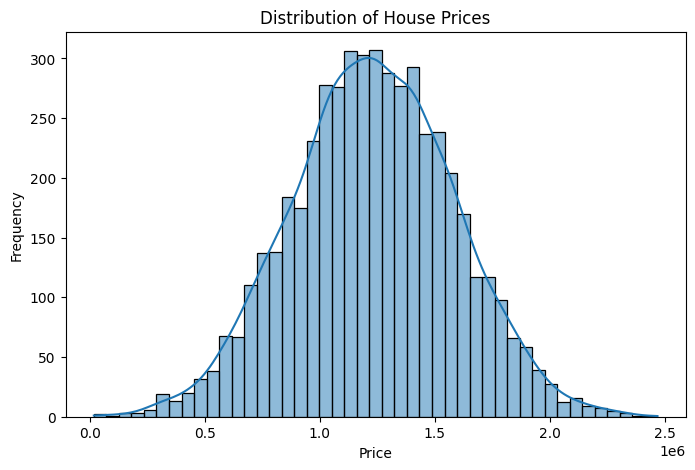

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


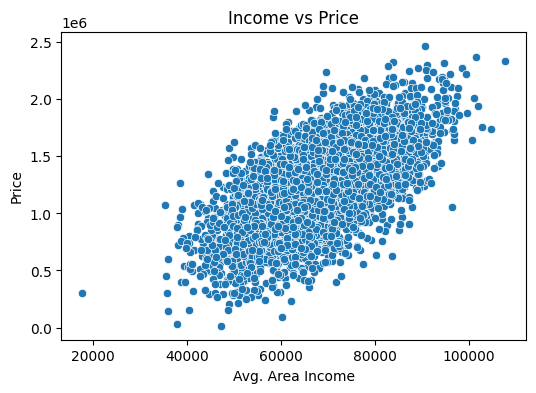

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Avg. Area Income"], y=df["Price"])
plt.title("Income vs Price")
plt.show()


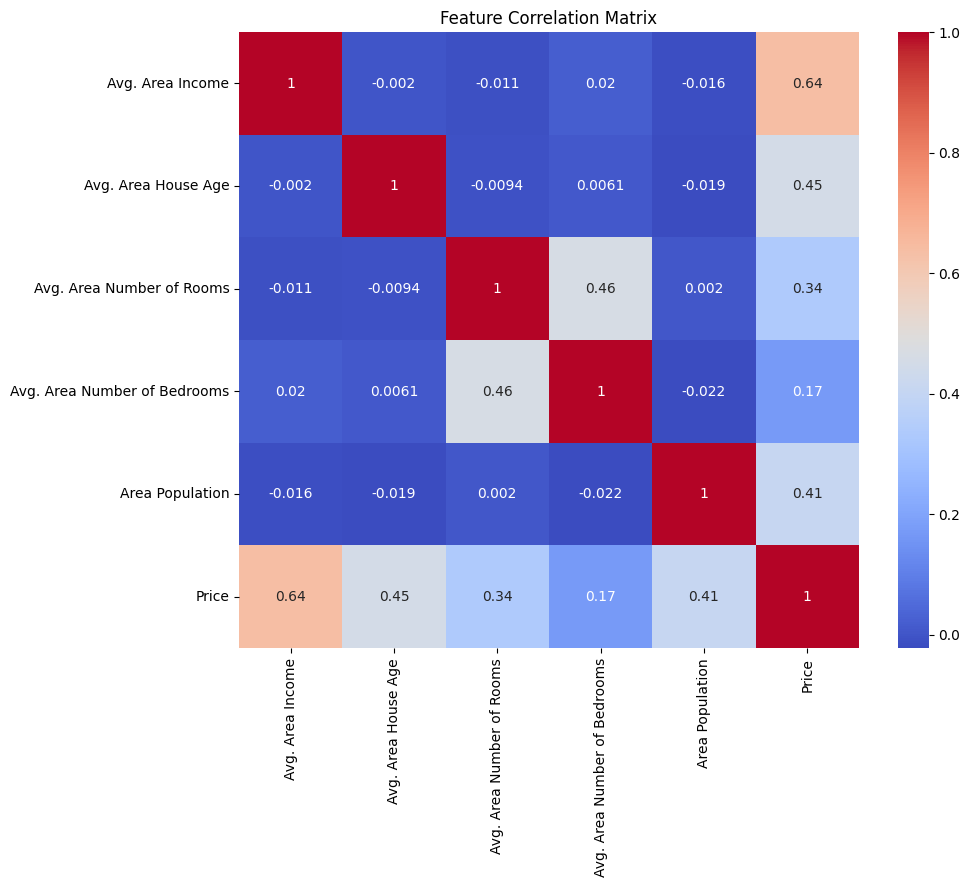

In [12]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()



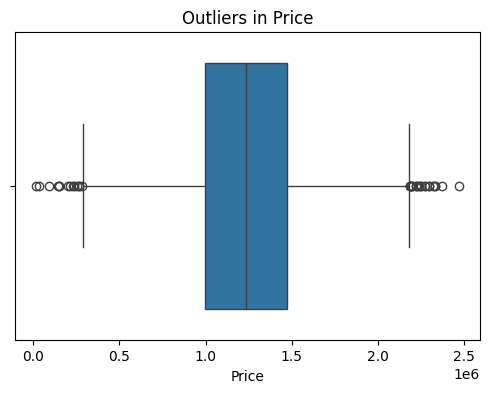

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Price"])
plt.title("Outliers in Price")
plt.show()


In [14]:
X = df.drop("Price", axis=1)
y = df["Price"]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [16]:
X_train.shape, X_test.shape


((4000, 5), (1000, 5))

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
X_train_scaled.mean(), X_train_scaled.std()


(np.float64(-9.761080832504376e-17), np.float64(1.0))

In [19]:
import torch
import torch.nn as nn



In [20]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [21]:
class HousePriceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(5, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)


In [22]:
model = HousePriceModel()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [23]:
epochs = 100

for epoch in range(epochs):
    model.train()

    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {loss.item():.4f}")


Epoch [10/100] - Loss: 1636903157760.0000
Epoch [20/100] - Loss: 1636902109184.0000
Epoch [30/100] - Loss: 1636900798464.0000
Epoch [40/100] - Loss: 1636898963456.0000
Epoch [50/100] - Loss: 1636896735232.0000
Epoch [60/100] - Loss: 1636893458432.0000
Epoch [70/100] - Loss: 1636889657344.0000
Epoch [80/100] - Loss: 1636884414464.0000
Epoch [90/100] - Loss: 1636877860864.0000
Epoch [100/100] - Loss: 1636869996544.0000


In [24]:
model.eval()

with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)

print("Test MSE:", test_loss.item())


Test MSE: 1665698496512.0


In [25]:
import os

os.makedirs("../models", exist_ok=True)

torch.save(model.state_dict(), "../models/house_price_model.pt")


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [27]:
model.eval()

with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()


In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MSE : 1665698400864.5742
RMSE: 1290619.3865212835
R²  : -12.538691221208714


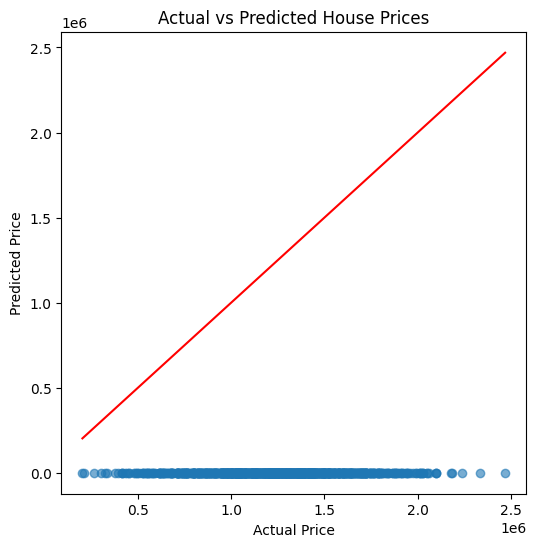

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


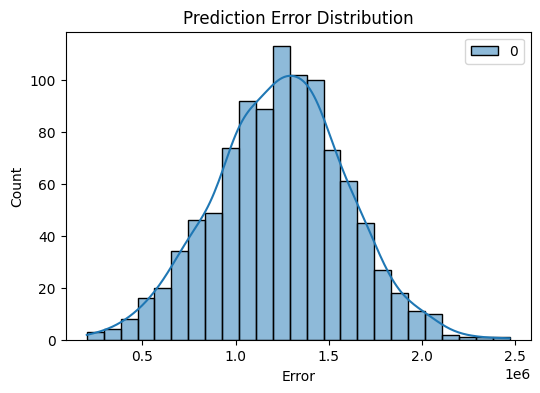

In [30]:
errors = y_test.values.reshape(-1,1) - y_pred

plt.figure(figsize=(6,4))
sns.histplot(errors, kde=True)
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.show()


In [31]:
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())


PyTorch version: 2.9.1+cpu
CUDA available: False
Device count: 0
